In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import datetime

C:\Users\VISHAL JATIA\Desktop\ML-Hackathon\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
indegenous_cases = pd.read_csv("data/malaria indegenous data.csv")
falciparum = pd.read_csv("data/p-falciparum-malaria.csv")
vivax = pd.read_csv("data/p-vivax-malaria.csv")

In [3]:
indegenous_cases = indegenous_cases.sort_values(by =['Location', 'Period'], ascending = True)

In [4]:
vivax

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,FactValueNumeric,Value,Language,DateModified
0,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,EUR,Europe,Country,ARM,Armenia,Year,2020,True,0,0,EN,2022-02-09T18:30:00.000Z
1,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,AMR,Americas,Country,BLZ,Belize,Year,2020,True,0,0,EN,2022-02-09T18:30:00.000Z
2,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,WPR,Western Pacific,Country,CHN,China,Year,2020,True,0,0,EN,2022-02-09T18:30:00.000Z
3,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,AMR,Americas,Country,SLV,El Salvador,Year,2020,True,0,0,EN,2022-02-09T18:30:00.000Z
4,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,EUR,Europe,Country,GEO,Georgia,Year,2020,True,0,0,EN,2022-02-09T18:30:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,AMR,Americas,Country,SUR,Suriname,Year,2010,False,817,817,EN,2022-02-09T18:30:00.000Z
586,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,AMR,Americas,Country,COL,Colombia,Year,2010,False,83255,83 255,EN,2022-02-09T18:30:00.000Z
587,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,AMR,Americas,Country,GUY,Guyana,Year,2010,False,8402,8402,EN,2022-02-09T18:30:00.000Z
588,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,numeric,AMR,Americas,Country,HND,Honduras,Year,2010,False,8759,8759,EN,2022-02-09T18:30:00.000Z


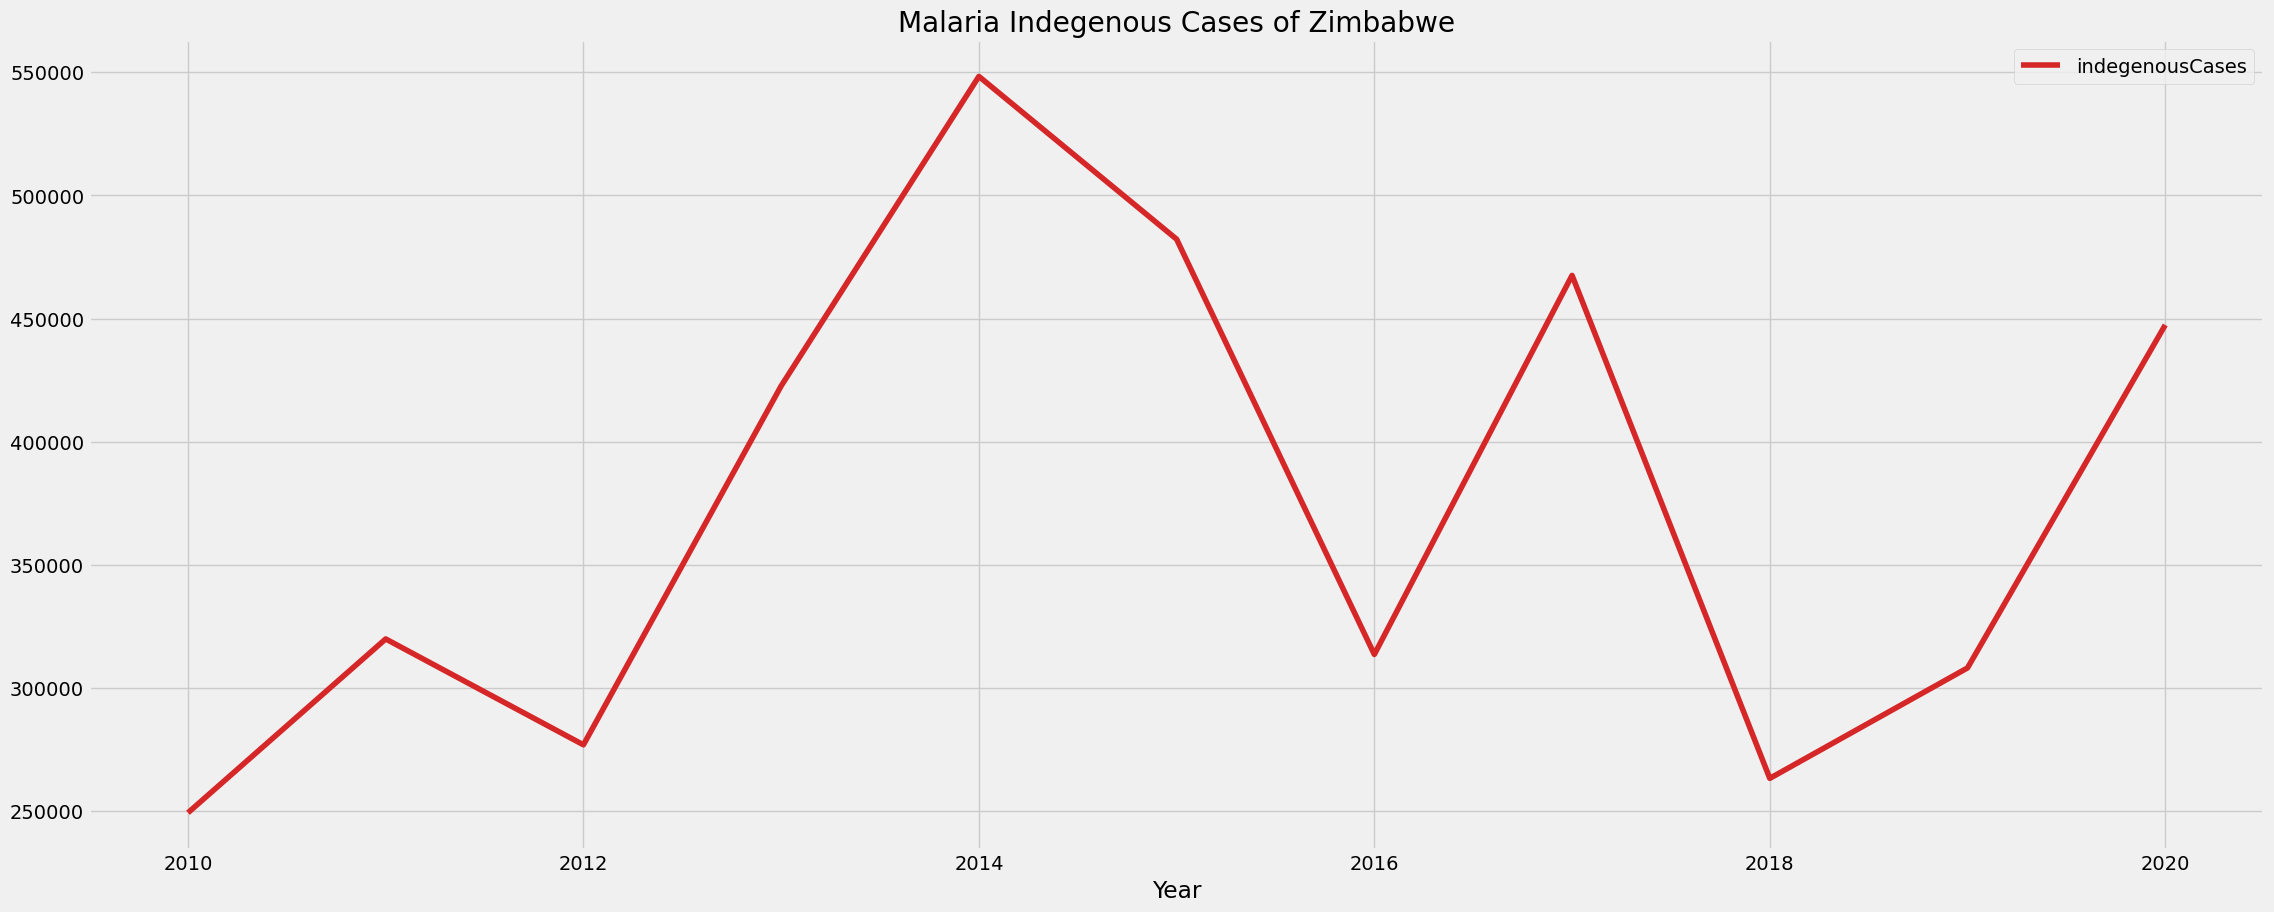

In [56]:
indegenous_cases.loc[indegenous_cases["Location"] == "Zimbabwe"].plot(x = "Year", y="indegenousCases", kind ='line',figsize = (25,10), color = color_pal[3], title = 'Malaria Indegenous Cases of Zimbabwe')
plt.show()

In [6]:
indegenous_cases.loc[indegenous_cases.Location == "India"]

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,FactValueNumeric,Value,Language,DateModified
1090,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2010,False,1599986.0,1 599 986,EN,2022-02-09T18:30:00.000Z
996,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2011,False,1310656.0,1 310 656,EN,2022-02-09T18:30:00.000Z
896,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2012,False,1067824.0,1 067 824,EN,2022-02-09T18:30:00.000Z
883,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2013,False,881730.0,881 730,EN,2022-02-09T18:30:00.000Z
703,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2014,False,1102205.0,1 102 205,EN,2022-02-09T18:30:00.000Z
603,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2015,False,1169261.0,1 169 261,EN,2022-02-09T18:30:00.000Z
503,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2016,False,1087285.0,1 087 285,EN,2022-02-09T18:30:00.000Z
485,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2017,False,844558.0,844 558,EN,2022-02-09T18:30:00.000Z
353,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2018,False,429928.0,429 928,EN,2022-02-09T18:30:00.000Z
258,MALARIA_INDIG,Number of indigenous malaria cases,numeric,SEAR,South-East Asia,Country,IND,India,Year,2019,False,338494.0,338 494,EN,2022-02-09T18:30:00.000Z


In [7]:
indegenous_cases = indegenous_cases.drop(["IndicatorCode","Indicator","ValueType","ParentLocationCode","ParentLocation","Location type","SpatialDimValueCode","DateModified","Period type","IsLatestYear","Value","Language","DateModified"], axis = 1)
falciparum = falciparum.drop(["IndicatorCode","Indicator","ValueType","ParentLocationCode","ParentLocation","Location type","SpatialDimValueCode","DateModified","Period type","IsLatestYear","Value","Language","DateModified"], axis = 1)
vivax = vivax.drop(["IndicatorCode","Indicator","ValueType","ParentLocationCode","ParentLocation","Location type","SpatialDimValueCode","DateModified","Period type","IsLatestYear","Value","Language","DateModified"], axis = 1)

In [8]:
falciparum

,Location,Period,FactValueNumeric
0,Argentina,2020,0
1,Armenia,2020,0
2,Bhutan,2020,0
3,Cabo Verde,2020,0
4,China,2020,0
...,...,...,...
838,Mozambique,2010,878009
839,Kenya,2010,898531
840,Ghana,2010,926447
841,Thailand,2010,9401


In [9]:
falciparum = falciparum.sort_values(by =['Location', 'Period'], ascending = True)
vivax = vivax.sort_values(by =['Location', 'Period'], ascending = True)

In [10]:
falciparum.rename(columns = {'FactValueNumeric':'casesDuetoFalciparum'}, inplace = True)
vivax.rename(columns = {'FactValueNumeric':'casesDuetoVivax'}, inplace = True)

In [11]:
indegenous_cases.rename(columns = {'FactValueNumeric':'indegenousCases'}, inplace = True)

In [12]:
final_data = indegenous_cases
final_data.rename(columns = {'Period':'Year'},inplace = True)
final_data

,Location,Year,indegenousCases
1159,Afghanistan,2010,69798.0
1069,Afghanistan,2011,77549.0
960,Afghanistan,2012,54840.0
864,Afghanistan,2013,52965.0
710,Afghanistan,2014,106478.0
...,...,...,...
546,Zimbabwe,2016,313645.0
462,Zimbabwe,2017,467508.0
335,Zimbabwe,2018,263346.0
252,Zimbabwe,2019,308173.0


In [13]:
falciparum.rename(columns = {'Period':'Year'},inplace = True)
vivax.rename(columns = {'Period':'Year'},inplace = True)
final_data = final_data.merge(falciparum, how = 'left', on = ['Location', 'Year'])

In [14]:
final_data = final_data.merge(vivax, how = 'left', on = ['Location', 'Year'])

In [15]:
final_data

,Location,Year,indegenousCases,casesDuetoFalciparum,casesDuetoVivax
0,Afghanistan,2010,69798.0,6142.0,63255.0
1,Afghanistan,2011,77549.0,5581.0,71968.0
2,Afghanistan,2012,54840.0,1231.0,53609.0
3,Afghanistan,2013,52965.0,1877.0,43369.0
4,Afghanistan,2014,106478.0,3000.0,58362.0
...,...,...,...,...,...
1169,Zimbabwe,2016,313645.0,279630.0,0.0
1170,Zimbabwe,2017,467508.0,315624.0,0.0
1171,Zimbabwe,2018,263346.0,183755.0,0.0
1172,Zimbabwe,2019,308173.0,308173.0,0.0


## Preparing features for Malaria intervention methods

In [16]:
itn_prevention = pd.read_csv("data/National_Unit-data1.csv")
irs_prevention = pd.read_csv("data/National_Unit-data-irs.csv")
treatment = pd.read_csv("data/National_Unit-data-treatmentSeeking.csv")

In [17]:
itn_prevention

,ISO3,Name,Admin Level,Metric,Units,Year,ItnUse,ItnUseRate,ItnAccess
0,AGO,Angola,admin0,Use,in 100 people,2010,15.188678,91.851593,15.641593
1,AGO,Angola,admin0,Use,in 100 people,2011,16.096260,92.660275,16.324810
2,AGO,Angola,admin0,Use,in 100 people,2012,11.694128,88.491596,12.233892
3,AGO,Angola,admin0,Use,in 100 people,2013,12.663664,85.439810,13.686747
4,AGO,Angola,admin0,Use,in 100 people,2014,22.418453,85.857444,24.772228
...,...,...,...,...,...,...,...,...,...
435,ZWE,Zimbabwe,admin0,Use,in 100 people,2016,22.407201,48.449454,44.142199
436,ZWE,Zimbabwe,admin0,Use,in 100 people,2017,31.243205,67.825095,44.187025
437,ZWE,Zimbabwe,admin0,Use,in 100 people,2018,25.849870,75.667174,32.877151
438,ZWE,Zimbabwe,admin0,Use,in 100 people,2019,26.195013,80.316802,31.379765


In [18]:
itn_prevention1 = itn_prevention.drop(['ISO3','Admin Level','Metric','Units'], axis = 1)
itn_prevention1.rename(columns = {"Name":"Location"}, inplace = True)

In [19]:
irs_prevention1 = irs_prevention.drop(['ISO3','Admin Level','Metric','Units'], axis = 1)
irs_prevention1.rename(columns = {"Name":"Location"}, inplace = True)

In [20]:
treatment1 = treatment.drop(['ISO3','Admin Level','Metric','Units'], axis = 1)
treatment1.rename(columns = {"Name":"Location"}, inplace = True)

In [21]:
treatment1.rename(columns = {'Value': 'Proportion to recieve effective treatment'},inplace = True)
irs_prevention1.rename(columns = {'Value': 'Proportion of houses with IRS'},inplace = True)

In [22]:
treatment1

,Location,Year,Proportion to recieve effective treatment
0,Angola,2010,44.434818
1,Angola,2011,48.527405
2,Angola,2012,46.557789
3,Angola,2013,47.221593
4,Angola,2014,47.640020
...,...,...,...
435,Zimbabwe,2016,38.842836
436,Zimbabwe,2017,38.483733
437,Zimbabwe,2018,38.431044
438,Zimbabwe,2019,36.690565


In [23]:
final_data = final_data.merge(itn_prevention1, how = 'left', on = ['Location', 'Year'])
final_data = final_data.merge(irs_prevention1, how = 'left', on = ['Location', 'Year'])
final_data = final_data.merge(treatment1, how = 'left', on = ['Location', 'Year'])

In [24]:
final_data.head(50)

,Location,Year,indegenousCases,casesDuetoFalciparum,casesDuetoVivax,ItnUse,ItnUseRate,ItnAccess,Proportion of houses with IRS,Proportion to recieve effective treatment
0,Afghanistan,2010,69798.0,6142.0,63255.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2011,77549.0,5581.0,71968.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2012,54840.0,1231.0,53609.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2013,52965.0,1877.0,43369.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2014,106478.0,3000.0,58362.0,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,2015,119859.0,4004.0,82891.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,2016,241233.0,6369.0,132407.0,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,2017,313086.0,6907.0,154468.0,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,2018,248689.0,6437.0,166583.0,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,2019,173860.0,2701.0,170747.0,NaN,NaN,NaN,NaN,NaN


In [64]:
final_data.loc[final_data.Location == "India"]

,Location,Year,indegenousCases,casesDuetoFalciparum,casesDuetoVivax,ItnUse,ItnUseRate,ItnAccess,Proportion of houses with IRS,Proportion to recieve effective treatment
530,India,2010,1599986.0,830779.0,765622.0,NaN,NaN,NaN,NaN,NaN
531,India,2011,1310656.0,662748.0,645652.0,NaN,NaN,NaN,NaN,NaN
532,India,2012,1067824.0,524370.0,534129.0,NaN,NaN,NaN,NaN,NaN
533,India,2013,881730.0,462079.0,417884.0,NaN,NaN,NaN,NaN,NaN
534,India,2014,1102205.0,720795.0,379659.0,NaN,NaN,NaN,NaN,NaN
535,India,2015,1169261.0,774627.0,390440.0,NaN,NaN,NaN,NaN,NaN
536,India,2016,1087285.0,706257.0,375783.0,NaN,NaN,NaN,NaN,NaN
537,India,2017,844558.0,525637.0,315028.0,NaN,NaN,NaN,NaN,NaN
538,India,2018,429928.0,204733.0,222730.0,NaN,NaN,NaN,NaN,NaN
539,India,2019,338494.0,154645.0,181514.0,NaN,NaN,NaN,NaN,NaN


In [39]:
final_data.to_csv("data/cumulativeData.csv",index = False)

In [25]:
## backup
final_data6 = pd.read_csv("data/cumulativeData.csv", index_col=None)

## Handling Missing Data

In [28]:
final_data6.isna().sum()

Location                                     0
Year                                         0
indegenousCases                              0
casesDuetoFalciparum                         0
casesDuetoVivax                              0
ItnUse                                       0
ItnUseRate                                   0
ItnAccess                                    0
Proportion of houses with IRS                0
Proportion to recieve effective treatment    0
dtype: int64

In [27]:
final_data6.dropna(subset = ["Proportion of houses with IRS"], inplace = True)
final_data6.dropna(subset = ["casesDuetoVivax"], inplace = True)

In [29]:
final_data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 252 to 1172
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Location                                   51 non-null     object 
 1   Year                                       51 non-null     int64  
 2   indegenousCases                            51 non-null     float64
 3   casesDuetoFalciparum                       51 non-null     float64
 4   casesDuetoVivax                            51 non-null     float64
 5   ItnUse                                     51 non-null     float64
 6   ItnUseRate                                 51 non-null     float64
 7   ItnAccess                                  51 non-null     float64
 8   Proportion of houses with IRS              51 non-null     float64
 9   Proportion to recieve effective treatment  51 non-null     float64
dtypes: float64(8), int64(1),

In [30]:
final_data6.Year

252     2010
253     2011
254     2012
255     2013
328     2016
329     2017
330     2018
331     2019
332     2020
379     2010
380     2011
381     2012
382     2013
383     2014
384     2015
385     2016
386     2017
387     2018
388     2019
389     2020
402     2010
403     2011
404     2012
405     2013
406     2014
407     2015
408     2016
409     2017
410     2018
411     2019
412     2020
416     2010
632     2020
945     2019
968     2020
987     2016
988     2017
989     2018
990     2019
991     2020
1074    2010
1163    2010
1164    2011
1165    2012
1166    2013
1167    2014
1168    2015
1169    2016
1170    2017
1171    2018
1172    2019
Name: Year, dtype: int64

## Splitting train and test data

In [31]:
X = final_data6.drop("indegenousCases",axis = 1)
y = final_data6["indegenousCases"]

X_train = X.loc[X.Year<2018]
y_train = y.loc[final_data6.Year<2018]
X_test = X.loc[X.Year>=2018]
y_test = y.loc[final_data6.Year>=2018]

In [63]:
X_train

,Location,Year,casesDuetoFalciparum,casesDuetoVivax,ItnUse,ItnUseRate,ItnAccess,Proportion of houses with IRS,Proportion to recieve effective treatment
252,Comoros,2010,33791.0,528.0,66.809993,89.404019,72.079950,0.000000,12.691648
253,Comoros,2011,21387.0,334.0,67.991345,91.524743,72.270205,0.000000,11.613148
254,Comoros,2012,43681.0,637.0,47.149706,92.414440,49.925595,28.673664,11.307612
255,Comoros,2013,45669.0,72.0,65.718828,95.448268,66.875083,0.000000,13.677478
328,Djibouti,2016,11781.0,2041.0,6.676126,67.624134,9.366733,0.000158,45.741120
329,Djibouti,2017,9290.0,5381.0,19.488361,71.199669,26.297537,0.000217,45.182600
379,Eritrea,2010,9785.0,3989.0,25.888041,75.512790,33.021797,0.646775,43.034334
380,Eritrea,2011,10263.0,4932.0,33.695402,78.534739,41.527081,0.842535,41.319270
381,Eritrea,2012,12121.0,9204.0,34.013566,78.319002,42.200650,0.929294,44.207325
382,Eritrea,2013,12482.0,7361.0,27.910808,75.944116,35.540205,0.823377,39.701896


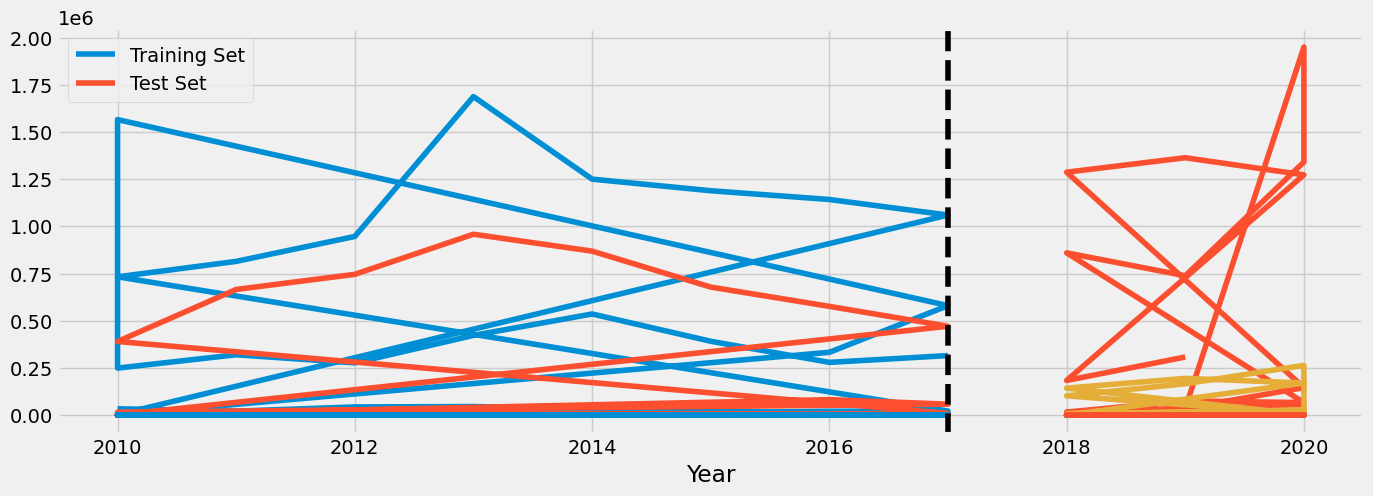

In [33]:
fig, ax =plt.subplots(figsize=(15, 5))
X_train.plot(x = "Year",kind = 'line',ax=ax, label= 'Training Set')
X_test.plot(x = "Year",kind = 'line',ax=ax, label= 'Test Set')
ax.axvline(2017, color = 'black', ls = '--')
ax.legend(["Training Set", "Test Set"])
plt.show()

## Converting the non-numerical data to numerical data 

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeature = ["Location"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categoricalFeature)], remainder = 'passthrough')
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.fit_transform(X_test)
transformed_X_test

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.01800000e+03, 1.61300000e+04, 9.18900000e+03, 2.53244184e+01,
        7.27472751e+01, 3.34280258e+01, 8.06119211e-04, 4.63040560e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.01900000e+03, 3.60250000e+04, 1.33770000e+04, 1.59775548e+01,
        7.07320191e+01, 2.13328987e+01, 7.49947941e+00, 4.71419204e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.02000000e+03, 4.65370000e+04, 2.69980000e+04, 6.49058917e+00,
        6.85913707e+01, 8.74016817e+00, 7.51914022e+00, 4.96115433e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 252 to 1170
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Location                                   34 non-null     object 
 1   Year                                       34 non-null     int64  
 2   casesDuetoFalciparum                       34 non-null     float64
 3   casesDuetoVivax                            34 non-null     float64
 4   ItnUse                                     34 non-null     float64
 5   ItnUseRate                                 34 non-null     float64
 6   ItnAccess                                  34 non-null     float64
 7   Proportion of houses with IRS              34 non-null     float64
 8   Proportion to recieve effective treatment  34 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.7+ KB


In [41]:
np.random.seed()
reg = xgb.XGBRegressor(n_estimators = 100000 , early_stopping_rounds = 50 ,learning_rate = 0.01)
reg.fit(transformed_X_train, y_train, eval_set = [(transformed_X_train,y_train), (transformed_X_test, y_test)], verbose = 100)

[00:55:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:956734.00000	validation_1-rmse:1015003.12500
[100]	validation_0-rmse:428301.71875	validation_1-rmse:407664.50000
[200]	validation_0-rmse:213495.17188	validation_1-rmse:260326.31250
[300]	validation_0-rmse:117220.62500	validation_1-rmse:223380.26562
[400]	validation_0-rmse:67946.77344	validation_1-rmse:219740.43750
[500]	validation_0-rmse:40281.14062	validation_1-rmse:218813.37500
[600]	validation_0-rmse:24093.08789	validation_1-rmse:218229.29688
[700]	validation_0-rmse:14501.60449	validation_1-rmse:218004.57812
[800]	validation_0-rmse:8766.96387	validation_1-rmse:217786.90625
[900]	validation_0-rmse

[12200]	validation_0-rmse:5.40655	validation_1-rmse:217558.23438
[12300]	validation_0-rmse:5.40655	validation_1-rmse:217558.15625
[12400]	validation_0-rmse:5.40655	validation_1-rmse:217558.06250
[12500]	validation_0-rmse:5.40655	validation_1-rmse:217557.96875
[12600]	validation_0-rmse:5.40655	validation_1-rmse:217557.89062
[12700]	validation_0-rmse:5.40655	validation_1-rmse:217557.79688
[12800]	validation_0-rmse:5.40655	validation_1-rmse:217557.71875
[12900]	validation_0-rmse:5.40655	validation_1-rmse:217557.62500
[13000]	validation_0-rmse:5.40655	validation_1-rmse:217557.54688
[13100]	validation_0-rmse:5.40655	validation_1-rmse:217557.45312
[13200]	validation_0-rmse:5.40655	validation_1-rmse:217557.37500
[13300]	validation_0-rmse:5.40655	validation_1-rmse:217557.28125
[13400]	validation_0-rmse:5.40655	validation_1-rmse:217557.18750
[13500]	validation_0-rmse:5.40655	validation_1-rmse:217557.10938
[13600]	validation_0-rmse:5.40655	validation_1-rmse:217557.01562
[13700]	validation_0-rmse

[24900]	validation_0-rmse:5.40655	validation_1-rmse:217547.25000
[25000]	validation_0-rmse:5.40655	validation_1-rmse:217547.17188
[25100]	validation_0-rmse:5.40655	validation_1-rmse:217547.07812
[25200]	validation_0-rmse:5.40655	validation_1-rmse:217547.00000
[25300]	validation_0-rmse:5.40655	validation_1-rmse:217546.90625
[25400]	validation_0-rmse:5.40655	validation_1-rmse:217546.81250
[25500]	validation_0-rmse:5.40655	validation_1-rmse:217546.73438
[25600]	validation_0-rmse:5.40655	validation_1-rmse:217546.64062
[25700]	validation_0-rmse:5.40655	validation_1-rmse:217546.56250
[25800]	validation_0-rmse:5.40655	validation_1-rmse:217546.46875
[25900]	validation_0-rmse:5.40655	validation_1-rmse:217546.39062
[26000]	validation_0-rmse:5.40655	validation_1-rmse:217546.31250
[26100]	validation_0-rmse:5.40655	validation_1-rmse:217546.21875
[26200]	validation_0-rmse:5.40655	validation_1-rmse:217546.12500
[26300]	validation_0-rmse:5.40655	validation_1-rmse:217546.04688
[26400]	validation_0-rmse

[37600]	validation_0-rmse:5.40655	validation_1-rmse:217536.31250
[37700]	validation_0-rmse:5.40655	validation_1-rmse:217536.21875
[37800]	validation_0-rmse:5.40655	validation_1-rmse:217536.14062
[37900]	validation_0-rmse:5.40655	validation_1-rmse:217536.06250
[38000]	validation_0-rmse:5.40655	validation_1-rmse:217535.96875
[38100]	validation_0-rmse:5.40655	validation_1-rmse:217535.89062
[38200]	validation_0-rmse:5.40655	validation_1-rmse:217535.79688
[38300]	validation_0-rmse:5.40655	validation_1-rmse:217535.70312
[38400]	validation_0-rmse:5.40655	validation_1-rmse:217535.62500
[38500]	validation_0-rmse:5.40655	validation_1-rmse:217535.53125
[38600]	validation_0-rmse:5.40655	validation_1-rmse:217535.45312
[38700]	validation_0-rmse:5.40655	validation_1-rmse:217535.37500
[38800]	validation_0-rmse:5.40655	validation_1-rmse:217535.28125
[38900]	validation_0-rmse:5.40655	validation_1-rmse:217535.18750
[39000]	validation_0-rmse:5.40655	validation_1-rmse:217535.10938
[39100]	validation_0-rmse

[50300]	validation_0-rmse:5.40655	validation_1-rmse:217525.40625
[50400]	validation_0-rmse:5.40655	validation_1-rmse:217525.32812
[50500]	validation_0-rmse:5.40655	validation_1-rmse:217525.23438
[50600]	validation_0-rmse:5.40655	validation_1-rmse:217525.15625
[50700]	validation_0-rmse:5.40655	validation_1-rmse:217525.06250
[50800]	validation_0-rmse:5.40655	validation_1-rmse:217524.98438
[50900]	validation_0-rmse:5.40655	validation_1-rmse:217524.90625
[51000]	validation_0-rmse:5.40655	validation_1-rmse:217524.81250
[51100]	validation_0-rmse:5.40655	validation_1-rmse:217524.73438
[51200]	validation_0-rmse:5.40655	validation_1-rmse:217524.64062
[51300]	validation_0-rmse:5.40655	validation_1-rmse:217524.56250
[51400]	validation_0-rmse:5.40655	validation_1-rmse:217524.46875
[51500]	validation_0-rmse:5.40655	validation_1-rmse:217524.39062
[51600]	validation_0-rmse:5.40655	validation_1-rmse:217524.31250
[51700]	validation_0-rmse:5.40655	validation_1-rmse:217524.21875
[51800]	validation_0-rmse

[63000]	validation_0-rmse:5.40655	validation_1-rmse:217514.54688
[63100]	validation_0-rmse:5.40655	validation_1-rmse:217514.48438
[63200]	validation_0-rmse:5.40655	validation_1-rmse:217514.39062
[63300]	validation_0-rmse:5.40655	validation_1-rmse:217514.31250
[63400]	validation_0-rmse:5.40655	validation_1-rmse:217514.21875
[63500]	validation_0-rmse:5.40655	validation_1-rmse:217514.12500
[63600]	validation_0-rmse:5.40655	validation_1-rmse:217514.04688
[63700]	validation_0-rmse:5.40655	validation_1-rmse:217513.95312
[63800]	validation_0-rmse:5.40655	validation_1-rmse:217513.87500
[63900]	validation_0-rmse:5.40655	validation_1-rmse:217513.79688
[64000]	validation_0-rmse:5.40655	validation_1-rmse:217513.70312
[64100]	validation_0-rmse:5.40655	validation_1-rmse:217513.62500
[64200]	validation_0-rmse:5.40655	validation_1-rmse:217513.53125
[64300]	validation_0-rmse:5.40655	validation_1-rmse:217513.45312
[64400]	validation_0-rmse:5.40655	validation_1-rmse:217513.35938
[64500]	validation_0-rmse

[75700]	validation_0-rmse:5.40655	validation_1-rmse:217503.75000
[75800]	validation_0-rmse:5.40655	validation_1-rmse:217503.67188
[75900]	validation_0-rmse:5.40655	validation_1-rmse:217503.57812
[76000]	validation_0-rmse:5.40655	validation_1-rmse:217503.48438
[76100]	validation_0-rmse:5.40655	validation_1-rmse:217503.40625
[76200]	validation_0-rmse:5.40655	validation_1-rmse:217503.31250
[76300]	validation_0-rmse:5.40655	validation_1-rmse:217503.23438
[76400]	validation_0-rmse:5.40655	validation_1-rmse:217503.15625
[76500]	validation_0-rmse:5.40655	validation_1-rmse:217503.07812
[76600]	validation_0-rmse:5.40655	validation_1-rmse:217502.98438
[76700]	validation_0-rmse:5.40655	validation_1-rmse:217502.89062
[76800]	validation_0-rmse:5.40655	validation_1-rmse:217502.81250
[76900]	validation_0-rmse:5.40655	validation_1-rmse:217502.71875
[77000]	validation_0-rmse:5.40655	validation_1-rmse:217502.64062
[77100]	validation_0-rmse:5.40655	validation_1-rmse:217502.56250
[77200]	validation_0-rmse

[88400]	validation_0-rmse:5.40655	validation_1-rmse:217492.98438
[88500]	validation_0-rmse:5.40655	validation_1-rmse:217492.89062
[88600]	validation_0-rmse:5.40655	validation_1-rmse:217492.81250
[88700]	validation_0-rmse:5.40655	validation_1-rmse:217492.71875
[88800]	validation_0-rmse:5.40655	validation_1-rmse:217492.64062
[88900]	validation_0-rmse:5.40655	validation_1-rmse:217492.54688
[89000]	validation_0-rmse:5.40655	validation_1-rmse:217492.46875
[89100]	validation_0-rmse:5.40655	validation_1-rmse:217492.37500
[89200]	validation_0-rmse:5.40655	validation_1-rmse:217492.29688
[89300]	validation_0-rmse:5.40655	validation_1-rmse:217492.21875
[89400]	validation_0-rmse:5.40655	validation_1-rmse:217492.12500
[89500]	validation_0-rmse:5.40655	validation_1-rmse:217492.04688
[89600]	validation_0-rmse:5.40655	validation_1-rmse:217491.95312
[89700]	validation_0-rmse:5.40655	validation_1-rmse:217491.87500
[89800]	validation_0-rmse:5.40655	validation_1-rmse:217491.78125
[89900]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [62]:
#pd.DataFrame(transformed_X_train).rename(columns = {'8':'Year'}, inplace=True)
transformed_X_train

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.01000000e+03, 3.37910000e+04, 5.28000000e+02, 6.68099935e+01,
        8.94040190e+01, 7.20799501e+01, 0.00000000e+00, 1.26916485e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.01100000e+03, 2.13870000e+04, 3.34000000e+02, 6.79913446e+01,
        9.15247427e+01, 7.22702047e+01, 0.00000000e+00, 1.16131483e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.01200000e+03, 4.36810000e+04, 6.37000000e+02, 4.71497065e+01,
        9.24144403e+01, 4.99255951e+01, 2.86736644e+01, 1.13076124e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000

In [44]:
final = pd.DataFrame(data = reg.feature_importances_, index = reg.get_booster().feature_names, columns = ['Importance'])
final

,Importance
0,3.867241e-05
1,1.083219e-08
2,1.996203e-04
3,3.517195e-05
4,2.391326e-08
5,1.280288e-01
6,2.099003e-09
7,1.893507e-01
8,5.984675e-04
9,5.562984e-01


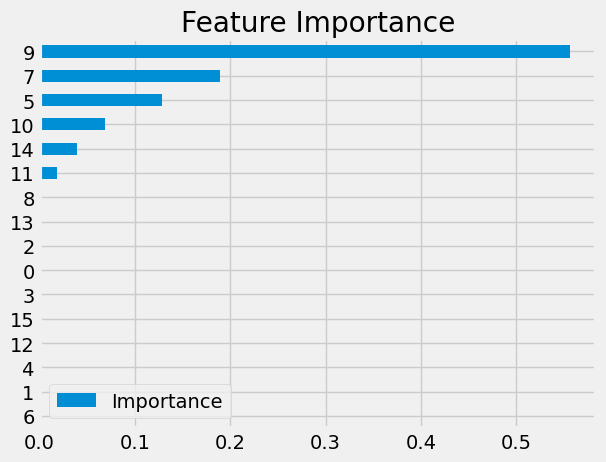

In [45]:
final.sort_values('Importance').plot(kind='barh', title= 'Feature Importance' )
plt.show()
# here '9' column represents the malaria caused by p-falciparum
# from the prediction it is evident that portion of population with access to IRS has the least danger of getting malaria.

In [42]:
reg.score(transformed_X_test,y_test)

0.9104309053770967

In [47]:
df = pd.DataFrame()
df['given'] = y_test
df['predict'] = reg.predict(transformed_X_test)
df

,given,predict
330,25319.0,1.439180e+04
331,49402.0,6.494430e+04
332,73535.0,6.684467e+04
387,46440.0,2.896347e+04
388,93878.0,7.101393e+04
389,74041.0,5.358428e+04
410,962087.0,1.429534e+06
411,904495.0,1.188986e+06
412,1743755.0,1.605474e+06
632,1950471.0,1.687653e+06


In [163]:
model.predict(transformed_X_test)

,0
0,18853.60
1,128627.36
2,135218.69
3,59631.27
4,133213.16
5,80635.11
6,1325457.40
7,1180794.48
8,1463046.53
9,1591375.81


#### Mean Absolute Percentage Error (mape)

In [51]:
mape = np.mean(np.abs((y_test - reg.predict(transformed_X_test))/y_test))*100
mape

27.0219497431815

## Importing Our Model

In [59]:
import pickle
with open('malariaPrediction.pkl', 'wb') as file:
	pickle.dump(reg, file)